# Projeto de chamadas de emergência (911) nos Estados Unidos da América

Para esse projeto será analisado o banco de dados de chamadas de emergência obtidos atráves do [Kaggle](https://www.kaggle.com/datasets/mchirico/montcoalert/data). Os dados apresentam os seguintes campos:

* `lat`: Variável do tipo Float, Latitude
* `lng`: Variável do tipo Float, Longitude
* `desc`: Variável do tipo String, Descrição da emergência
* `zip`: Variável do tipo Float, Zipcode (CEP dos EUA)
* `title`: Variável do tipo String, Título
* `timestamp`: Variável do tipo String, Data estilo YYYY-MM-DD HH:MM:SS
* `twp`: Variável do tipo String, Cidade
* `addr`: Variável do tipo String, Endereço
* `e`: Variável do tipo Int, Variável Fictícia (sempre 1)

Importando as bibliotecas necessárias, neste projeto utilizarei *pandas* para manipulação de dados, *matplotlib* para criar visualização de gráficos e *seaborn* para criação de gráficos

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Transformando o arquivo csv em um DataFrame, através de um método da biblioteca *pandas*

In [3]:
df = pd.read_csv('911.csv')

Checando as informações da base de dados, com o método `info` é possível verificar os nomes das colunas, quantidade de dados e seu tipo

In [4]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  str    
 3   zip        86637 non-null  float64
 4   title      99492 non-null  str    
 5   timeStamp  99492 non-null  str    
 6   twp        99449 non-null  str    
 7   addr       98973 non-null  str    
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), str(5)
memory usage: 6.8 MB


Já o método `head` imprime os 5 primeiros registros do DataFrame

In [5]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


Podemos observar que na coluna `title` existe um padrão de `categoria: descrição do problema`, que poderia ser separado em duas colunas. Para a separação, criarei uma nova coluna, que utilizará a coluna de `title` como referência, porém pegará apenas o que está antes dos dois pontos (categoria:descrição)

In [6]:
df['reason'] = df['title'].apply(lambda title: title.split(':')[0])

In [7]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS


Verificando quantas categorias existem com o método `value_counts` que conta a quantidade de registros em cada tipo único na coluna especificada, neste caso a de categorias.

In [8]:
df['reason'].value_counts().head()

reason
EMS        48877
Traffic    35695
Fire       14920
Name: count, dtype: int64

Como estão distribuídas as chamadas de emergência entre essas três categorias de ligações?

Para resolver essa pergunta, foi utilizado um simples countplot, que cria um gráfico a partir da contagem de registros, com orientação no parâmetro x, que defini como sendo a coluna de categorias.

<Axes: xlabel='reason', ylabel='count'>

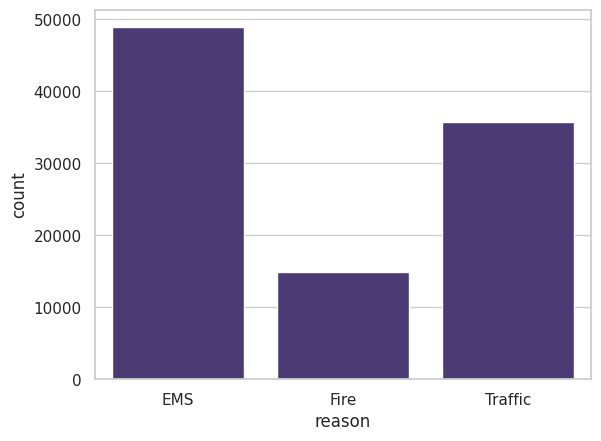

In [9]:
sns.set_theme(palette='viridis', style='whitegrid')
sns.countplot(data=df, x='reason')

Voltando a análise das colunas do DataFrame, pôde-se verificar que a coluna de `TimeStamp` está com o tipo *String*, porém é mais fácil manipular os dados quando se utiliza o tipo *Datetime*. Para tal transformação de tipos, irei utilizar o método `to_datetime` da biblioteca *Pandas*.

In [10]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

In [11]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS


In [12]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   lat        99492 non-null  float64       
 1   lng        99492 non-null  float64       
 2   desc       99492 non-null  str           
 3   zip        86637 non-null  float64       
 4   title      99492 non-null  str           
 5   timeStamp  99492 non-null  datetime64[us]
 6   twp        99449 non-null  str           
 7   addr       98973 non-null  str           
 8   e          99492 non-null  int64         
 9   reason     99492 non-null  str           
dtypes: datetime64[us](1), float64(3), int64(1), str(5)
memory usage: 7.6 MB


Os dados não foram alterados, apenas seu tipo. Agora é possível extrair informações desta coluna separadamente, com métodos próprios do tipo `Datetime`. Será analisada as horas, os dias da semana e os meses de forma separada, criando-se uma nova coluna para cada.

In [13]:
df['hour'] = df['timeStamp'].dt.hour

df['month'] = df['timeStamp'].dt.month

df['day_of_week'] = df['timeStamp'].dt.dayofweek

In [14]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,hour,month,day_of_week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,3
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,3
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,3
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,3
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,3


Novamente, com um countplot é possível visualizar como está distribuída a contagem desses dados por hora

<Axes: xlabel='hour', ylabel='count'>

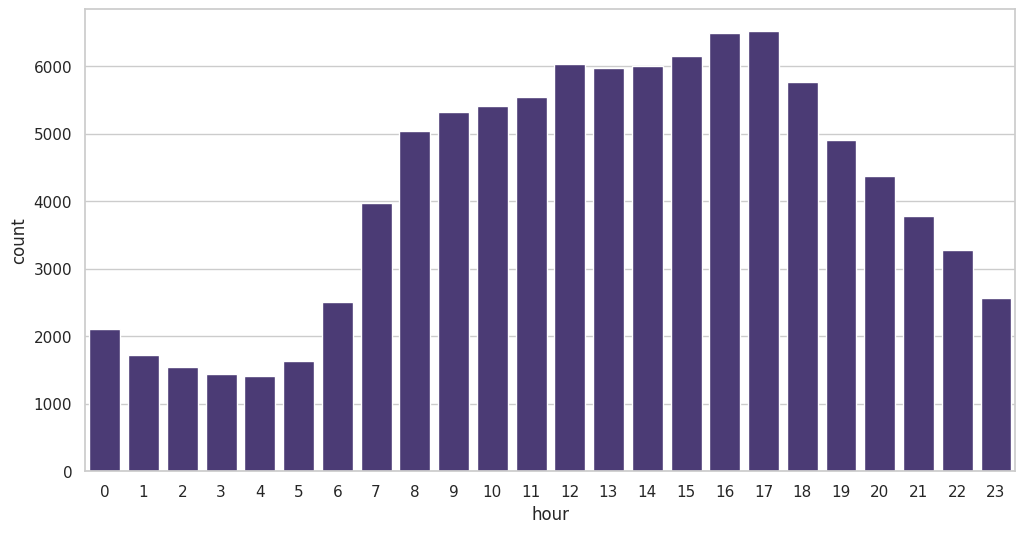

In [15]:
plt.figure(figsize=(12,6))
sns.countplot(data=df,x='hour')

No método `head` foi possível perceber que os dias da semana estão classificados em números (0 a 6), e transformá-los em String compatíveis com os dias da semana ajudaria na visualização e interpretação dos dados.

In [16]:
df['day_of_week'].value_counts().head(10)

day_of_week
1    15150
2    14879
4    14833
0    14680
3    14478
5    13336
6    12136
Name: count, dtype: int64

Para a transformação, criarei um dicionário onde ficará descrito qual número representa qual dia da semana. Depois, irei utilizar esse dicionário para aplicar em cada um dos registros, utilizando o método `map`.

In [17]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

df['day_of_week'] = df['day_of_week'].map(dmap)

df['day_of_week'].value_counts().head(10)

day_of_week
Tue    15150
Wed    14879
Fri    14833
Mon    14680
Thu    14478
Sat    13336
Sun    12136
Name: count, dtype: int64

Agora sim é válido a utilização de um countplot para visualizar a distribuição dos dados entre os dias da semana.

<Axes: xlabel='day_of_week', ylabel='count'>

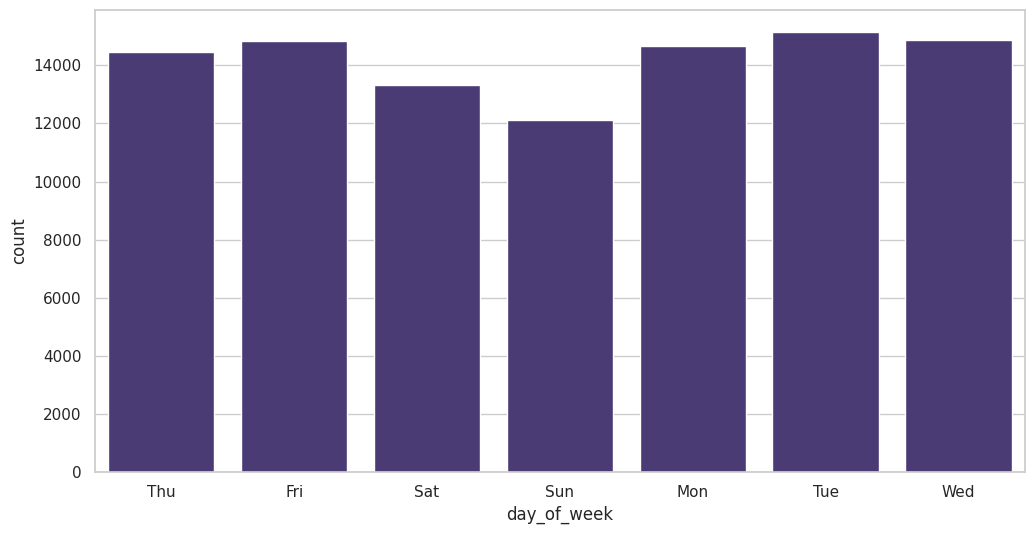

In [18]:
plt.figure(figsize=(12,6))
sns.countplot(data=df,x='day_of_week')

Com os dados organizados, é possível fazer visualizações utilizando mais de uma coluna, como por exemplo a contagem dos dados separados por dias da semana e por categorias.

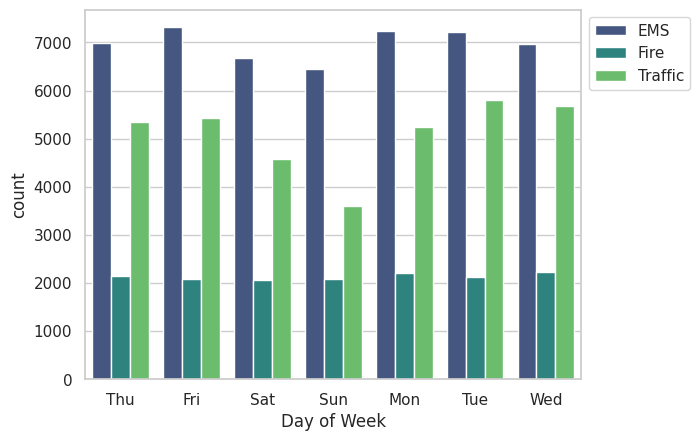

In [19]:
sns.countplot(data=df, x='day_of_week', hue='reason', palette='viridis').legend(bbox_to_anchor=(1., 1.))
plt.xlabel('Day of Week')
plt.show()

É possível verificar que os chamados de emergência de tráfego são menos intensos nos finais de semana. Agora vamos fazer a mesma análise, porém utilizando os meses ao invés de dias da semana.

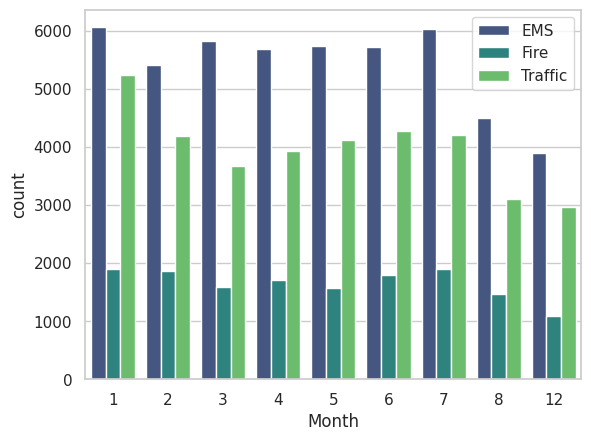

In [20]:
sns.countplot(data=df, x='month', hue='reason', palette='viridis').legend(bbox_to_anchor=(1., 1.))
plt.xlabel('Month')
plt.show()

Com o gráfico pode-se perceber que no mês de janeiro, todos os tipos de chamados são mais intensos.

Mas, além dessa análise, existe alguma coisa estranha neste gráfico, não existem dados entre os meses 9-11.

Um método para projetar como seria essa intensidade desses chamados nesses meses, é cruzar uma linha entre os meses anterior e posterior. Para isso deverá ser criado outro DataFrame, agrupado pelos meses.

In [21]:
byMonth = df.groupby('month').count()
byMonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,hour,day_of_week
month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423


<Axes: xlabel='month'>

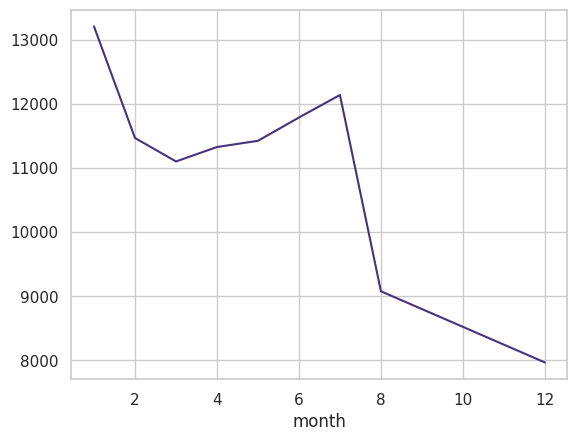

In [22]:
byMonth['title'].plot()

Por fim, é necessário indexar pelos meses para criar uma regressão linear.

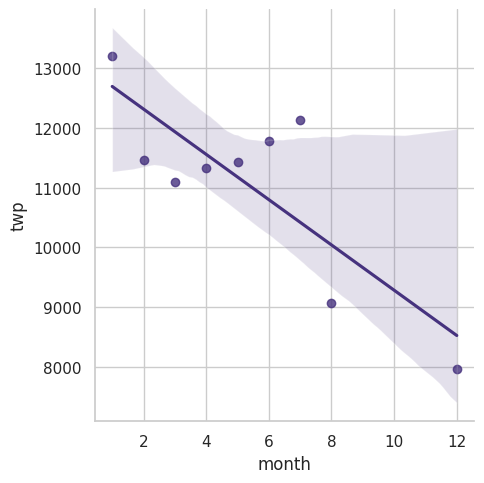

In [23]:
byMonth['month'] = byMonth.index

sns.lmplot(data=byMonth, x='month', y= 'twp')

Com o gráfico `lmplot` é possível estimar a quantidade aproximada de fluxo de chamadas de emergência nos meses faltantes, com base nos dados que temos.

Agora voltando para o DataFrame original, pode-se fazer um gráfico de calor para verificar a relação entre horas e dias da semana, ou seja, quais dias e quais horários são mais comuns as chamadas de emergência.

Para isso, precisarei criar outro DataFrame, agrupado por essas duas colunas. Por fim, irei chamar o método `heatmap` do *seaborn* e passar este novo DataFrame como parâmetro.

<Axes: xlabel='hour', ylabel='day_of_week'>

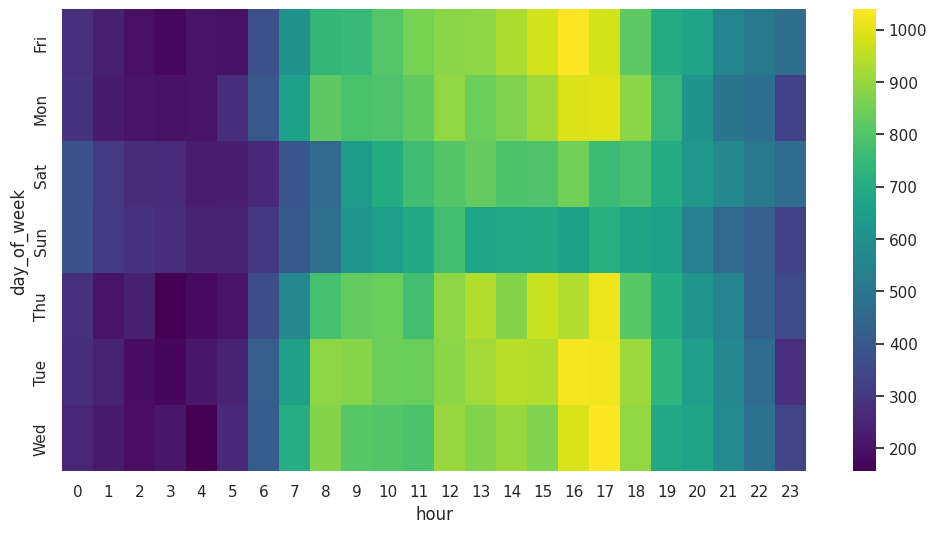

In [24]:
byDayHour = df.groupby(['day_of_week','hour']).count()['reason'].unstack()

plt.figure(figsize=(12,6))
sns.heatmap(data=byDayHour, cmap='viridis')

Com o gráfico, é fácil perceber que se tem dois blocos que indicam maior quantidade de ligações, segunda e sexta compoẽm um bloco e quarta, terça e quinta o outro.

Agora é possível utilizar o método `clustermap` para juntar os resultados mais próximos, indiferente de organização alfábetica ou numeral.

<Figure size 1000x400 with 0 Axes>

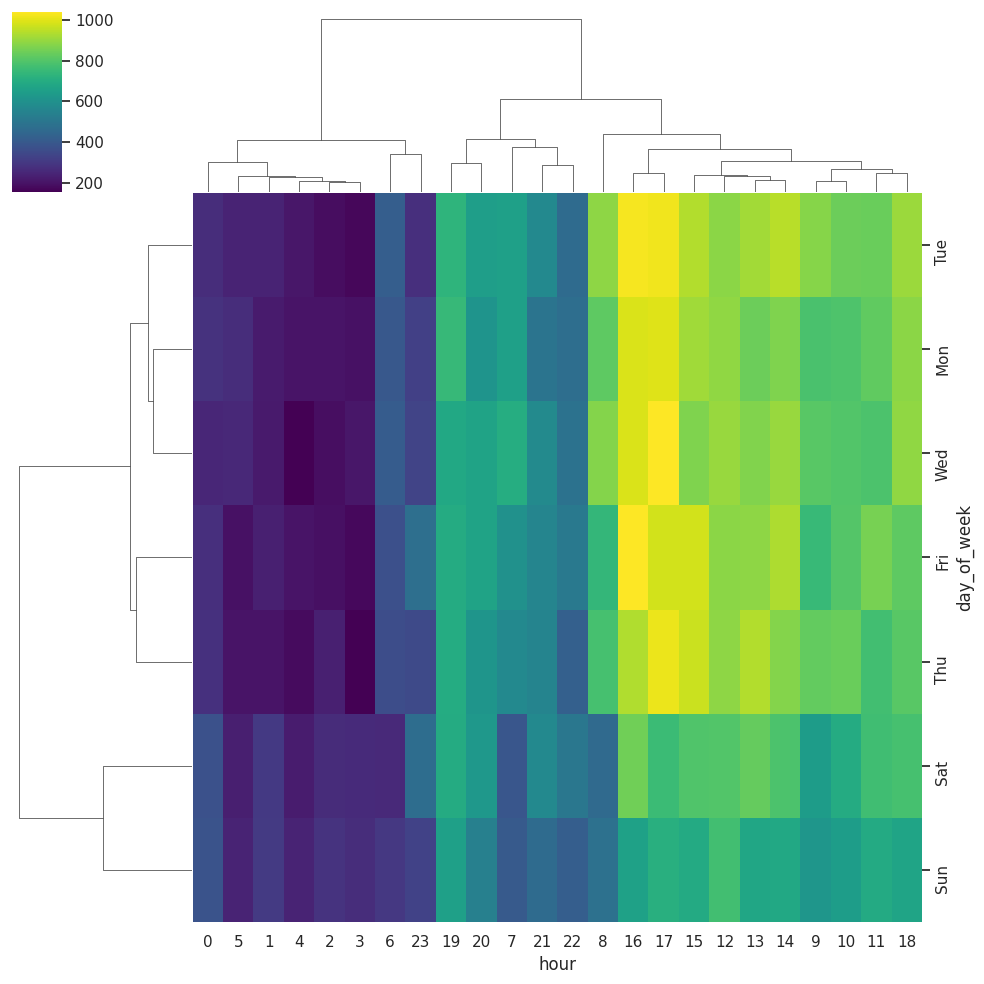

In [25]:
plt.figure(figsize=(10,4))
sns.clustermap(data=byDayHour, cmap='viridis')

Com o gráfico é notável que as horas 16, 17 e 15 nos dias terça, segunda, quarta e sexta são as que mais existem chamados.

Ideia reforçada pelos gráficos de  `pointplot` e `boxplot`, parametrizados pelas colunas de dia da semana e hora, e separados pelas categorias de chamadas de emergência.

<Axes: xlabel='day_of_week', ylabel='hour'>

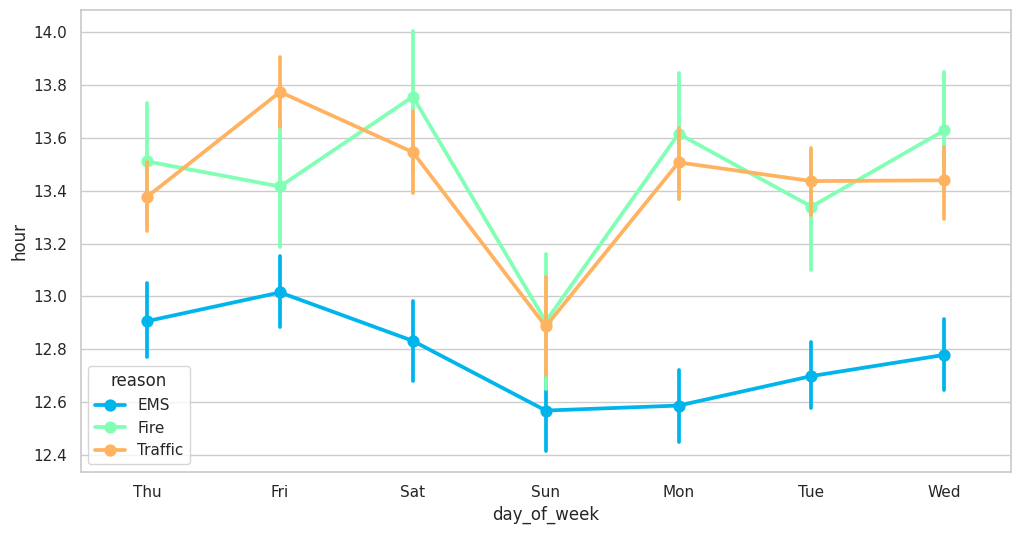

In [26]:
plt.figure(figsize=(12,6))
sns.pointplot(data=df, x='day_of_week',y='hour',hue='reason', palette='rainbow')

<Axes: xlabel='day_of_week', ylabel='hour'>

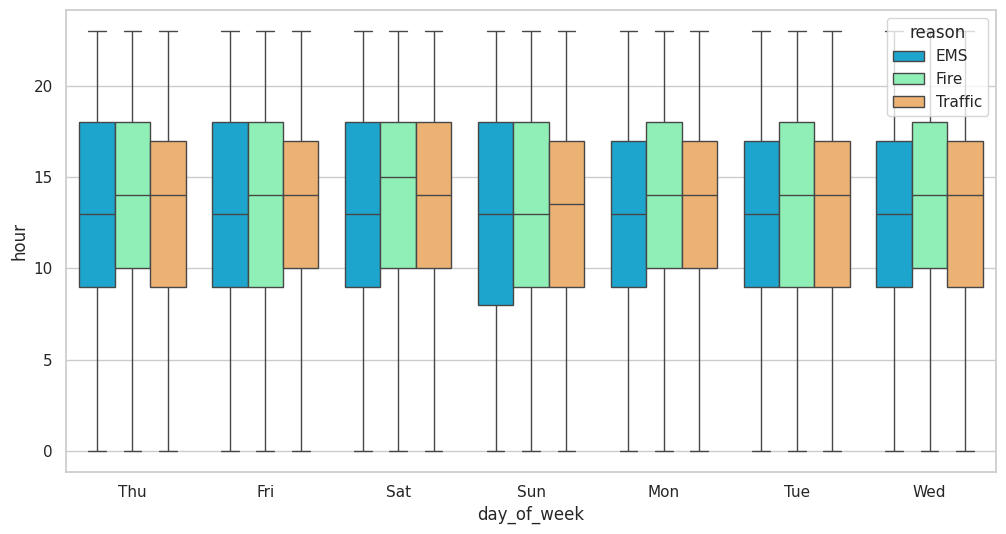

In [27]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df,x='day_of_week',y='hour',hue='reason', palette='rainbow')

O gráfico de `boxplot` apresenta detalhes interessantes, como mediana (linha dentro do retângulo) e desvio padrão (linhas de fora).

Ainda, é possível criar um gráfico para cada categoria, com a quantidade de chamados separado por data (yyyy-mm-dd).

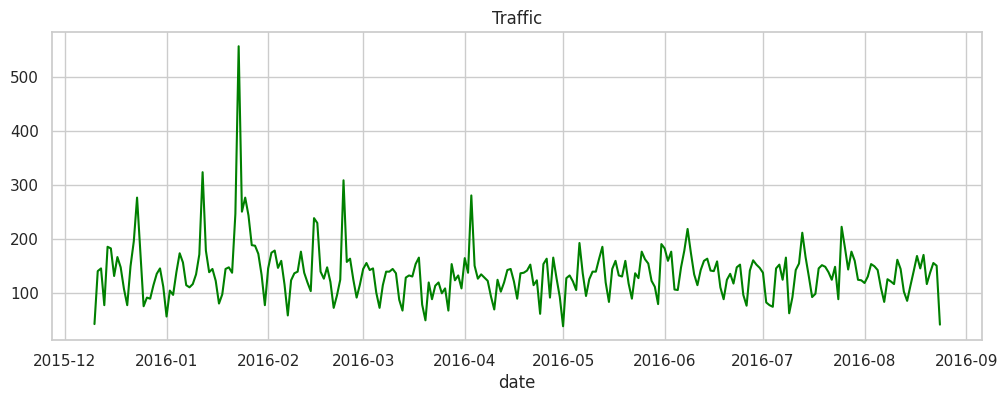

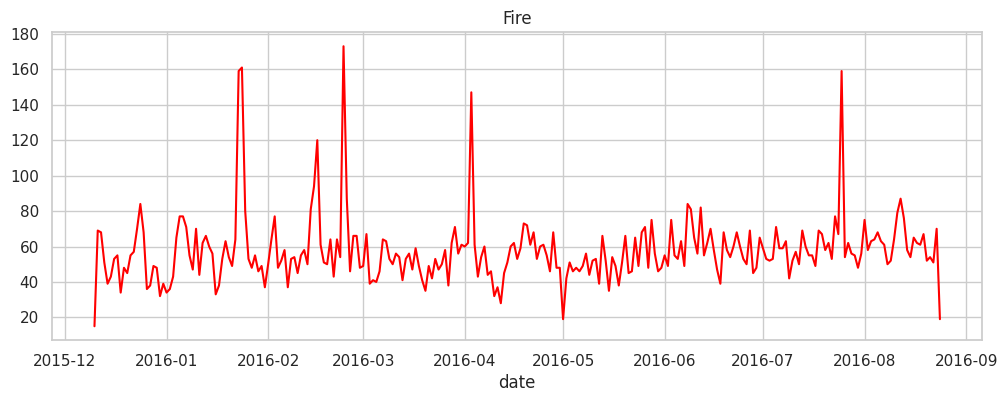

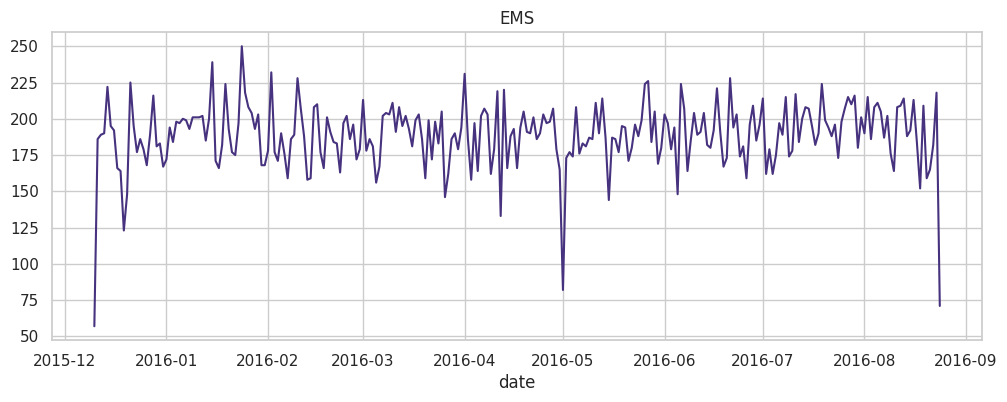

In [28]:
df['date'] = df['timeStamp'].dt.date

# Gráfico da categoria Traffic
plt.figure(figsize=(12,4))
df[df['reason'] == 'Traffic'].groupby('date').count()['title'].plot(color='green')
plt.title('Traffic')

# Gráfico da categoria Fire
plt.figure(figsize=(12,4))
df[df['reason'] == 'Fire'].groupby('date').count()['title'].plot(color='red')
plt.title('Fire')

# Gráfico da categoria EMS
plt.figure(figsize=(12,4))
df[df['reason'] == 'EMS'].groupby('date').count()['title'].plot()
plt.title('EMS')
plt.show()